**Random Forest**

O Random Forest é: Random Forest é um modelo baseado em muitas árvores de decisão.
Ele funciona criando várias árvores diferentes, cada uma treinada com:

• um conjunto distinto de dados (via bootstrap)
• um subconjunto aleatório de variáveis

Depois que todas as árvores são treinadas:

▪ Em classificação, cada árvore vota e o modelo escolhe a classe mais votada.
▪ Em regressão, o modelo retorna a média das previsões.

Essa aleatoriedade torna o Random Forest muito mais estável, menos sensível a ruídos, e mais preciso que uma árvore única.

**Resumo:**

É um modelo de machine learning que usa várias árvores de decisão para fazer previsões. Cada árvore é treinada com um subconjunto aleatório dos dados e um subconjunto aleatório das variáveis. Essa aleatoriedade diminui a correlação entre as árvores e evita o overfitting, tornando o modelo mais preciso e estável. Em classificação, as árvores votam, e em regressão, a média das previsões é retornada.

**Diferença entre Bagging e Random Forest**

**Bagging (Bootstrap Aggregation)**

Cria várias amostras bootstrap

Treina um modelo por amostra (geralmente árvores)

Não faz seleção de features

Agrega votos/médias

**Random Forest**

Random Forest = Bagging + Seleção Aleatória de Variáveis

Usa bootstrap

Treina várias árvores

A cada divisão da árvore, escolhe aleatoriamente um subconjunto das features

Isso reduz a correlação entre árvores

Aumenta a precisão

Evita que todas as árvores fiquem iguais

**Resumo:**

**Bagging** treina várias árvores com dados diferentes.
**Random Forest** treina várias árvores com dados diferentes e features diferentes.

**Implementação Random Forest do zero em python**

Random Forest manual (classificação)

In [3]:
#Importando as Bibliotecas

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Bootstrap

def bootstrap_sample(X, y):
    idx = np.random.choice(len(X), len(X), replace=True)
    return X[idx], y[idx]


# Random Forest Manual

class RandomForestManual:
    def __init__(self, n_estimators=10, max_features="sqrt"):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.trees = []
        self.features_idx = []

    def fit(self, X, y):
        n_features = X.shape[1]

        # Definir número de features por árvore
        if self.max_features == "sqrt":
            n_select = int(np.sqrt(n_features))
        elif self.max_features == "log2":
            n_select = int(np.log2(n_features))
        else:
            n_select = n_features

        for i in range(self.n_estimators):
            Xb, yb = bootstrap_sample(X, y)

            # Seleção aleatória de features
            f_idx = np.random.choice(n_features, n_select, replace=False)
            self.features_idx.append(f_idx)

            tree = DecisionTreeClassifier()
            tree.fit(Xb[:, f_idx], yb)
            self.trees.append(tree)

    def predict(self, X):
        preds = []

        for tree, f_idx in zip(self.trees, self.features_idx):
            preds.append(tree.predict(X[:, f_idx]))

        preds = np.array(preds)

        final = np.apply_along_axis(lambda x: np.bincount(x).argmax(),
                                    axis=0,
                                    arr=preds)
        return final


# Testando

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_manual = RandomForestManual(n_estimators=20)
rf_manual.fit(X_train, y_train)

y_pred = rf_manual.predict(X_test)

print("Acurácia Random Forest Manual:", accuracy_score(y_test, y_pred))

Acurácia Random Forest Manual: 1.0


Dataset usado para visualização

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

data = load_iris()
X = data.data[:, :2]   # Pegando só 2 features para conseguir fazer gráficos 2D
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=30,
    random_state=42
)

bag.fit(X_train, y_train)

In [8]:
!pip install scikit-learn --quiet
!pip install matplotlib seaborn --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

sns.set(style="whitegrid")

In [9]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

BAGGING

In [11]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=30,
    random_state=42
)

bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("Acurácia Bagging:", accuracy_score(y_test, y_pred_bag))

Acurácia Bagging: 1.0


RANDOM FOREST

In [12]:
print("""
PASSO A PASSO DO RANDOM FOREST:

1. Criar várias amostras bootstrap (como no Bagging)
2. Para cada árvore:
   - Sortear aleatoriamente um subconjunto de features
3. Treinar várias árvores independentes
4. Agregar:
   - Classificação -> votação
   - Regressão -> média
5. Mais diversidade = menos correlação entre árvores
""")


PASSO A PASSO DO RANDOM FOREST:

1. Criar várias amostras bootstrap (como no Bagging)
2. Para cada árvore:
   - Sortear aleatoriamente um subconjunto de features
3. Treinar várias árvores independentes
4. Agregar:
   - Classificação -> votação
   - Regressão -> média
5. Mais diversidade = menos correlação entre árvores



RANDOM FOREST (CLASSIFICAÇÃO)

In [13]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_features="sqrt",
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))

Acurácia Random Forest: 1.0


GRÁFICO COMPARANDO BAGGING X RANDOM FOREST

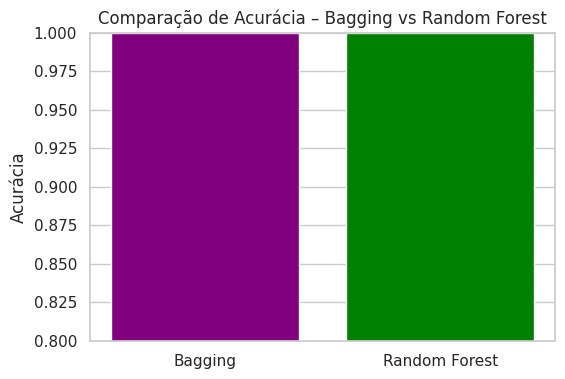

In [14]:
plt.figure(figsize=(6,4))
plt.bar(["Bagging", "Random Forest"],
        [accuracy_score(y_test, y_pred_bag),
         accuracy_score(y_test, y_pred_rf)],
        color=["purple", "green"])

plt.title("Comparação de Acurácia – Bagging vs Random Forest")
plt.ylabel("Acurácia")
plt.ylim(0.8,1)
plt.show()

FEATURES

/tmp/ipython-input-1171613006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette="viridis")


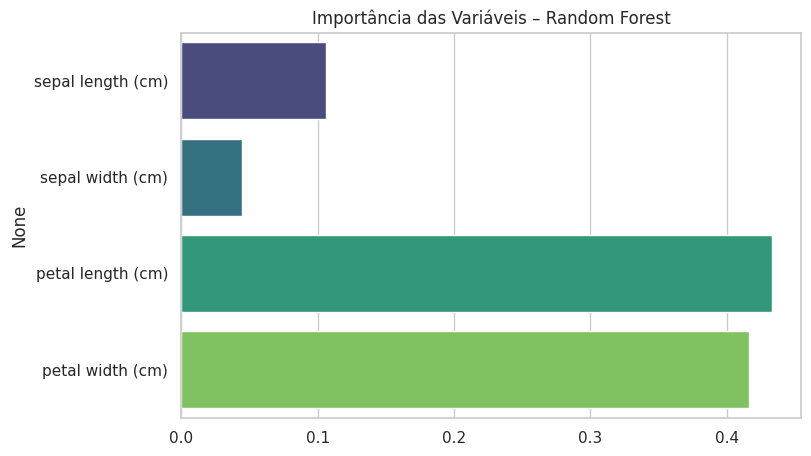

In [15]:
importances = rf.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=X.columns, palette="viridis")
plt.title("Importância das Variáveis – Random Forest")
plt.show()

VERSÃO PARA REGRESSÃO (BOSTON / CALIFÓRNIA)

In [17]:
from sklearn.datasets import fetch_california_housing

In [21]:
!pip install scikit-learn --quiet
!pip install seaborn matplotlib --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.datasets import load_iris, make_regression

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import (
    BaggingClassifier,
    BaggingRegressor,
    RandomForestClassifier,
    RandomForestRegressor
)

sns.set(style="whitegrid")

In [23]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=40,
    random_state=42
)

bag.fit(X_train, y_train)
pred_bag = bag.predict(X_test)

acc_bag = accuracy_score(y_test, pred_bag)
print("Acurácia Bagging:", acc_bag)

Acurácia Bagging: 1.0


In [25]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_features="sqrt",
    random_state=42
)

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, pred_rf)
print("Acurácia Random Forest:", acc_rf)

Acurácia Random Forest: 1.0


/tmp/ipython-input-3170512475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


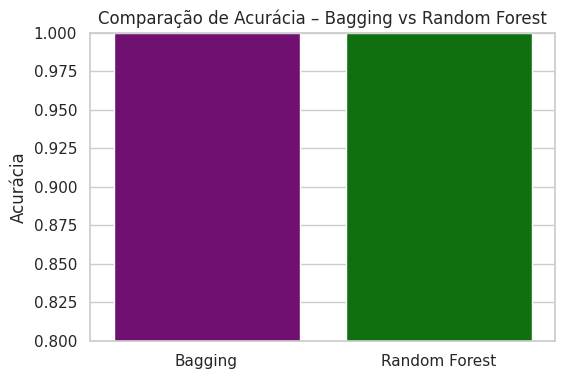

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=["Bagging", "Random Forest"],
    y=[acc_bag, acc_rf],
    palette=["purple", "green"]
)
plt.title("Comparação de Acurácia – Bagging vs Random Forest")
plt.ylabel("Acurácia")
plt.ylim(0.8,1)
plt.show()

/tmp/ipython-input-3322582301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


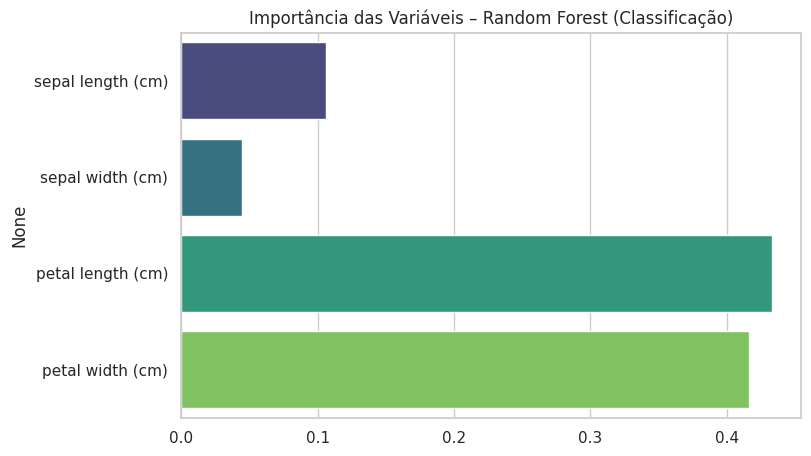

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=rf.feature_importances_,
    y=X.columns,
    palette="viridis"
)
plt.title("Importância das Variáveis – Random Forest (Classificação)")
plt.show()

BASE DE REGRESSÃO (make_regression)

In [28]:
Xr, yr = make_regression(
    n_samples=600,
    n_features=10,
    noise=12,
    random_state=42
)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.3, random_state=42
)

BAGGING REGRESSOR

In [29]:
bag_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=40,
    random_state=42
)

bag_reg.fit(Xr_train, yr_train)
pred_bag_r = bag_reg.predict(Xr_test)

mse_bag = mean_squared_error(yr_test, pred_bag_r)
print("MSE Bagging (Regressão):", mse_bag)

MSE Bagging (Regressão): 6440.823664144426


RANDOM FOREST REGRESSOR

In [30]:
rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_reg.fit(Xr_train, yr_train)
pred_rf_r = rf_reg.predict(Xr_test)

mse_rf = mean_squared_error(yr_test, pred_rf_r)
print("MSE Random Forest (Regressão):", mse_rf)

MSE Random Forest (Regressão): 6286.254531436556


GRÁFICO COMPARATIVO (Regressão)

/tmp/ipython-input-2590233457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


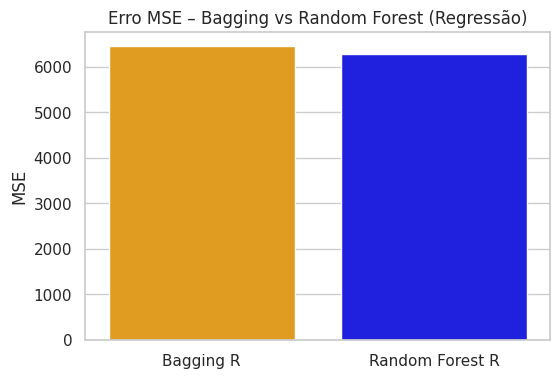

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=["Bagging R", "Random Forest R"],
    y=[mse_bag, mse_rf],
    palette=["orange", "blue"]
)
plt.title("Erro MSE – Bagging vs Random Forest (Regressão)")
plt.ylabel("MSE")
plt.show()

IMPORTÂNCIA DAS FEATURES (Regressão)

/tmp/ipython-input-1753619910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


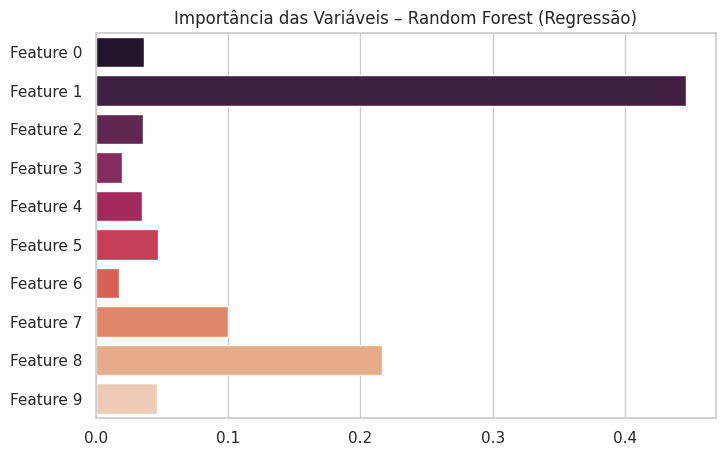

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=rf_reg.feature_importances_,
    y=[f"Feature {i}" for i in range(Xr.shape[1])],
    palette="rocket"
)
plt.title("Importância das Variáveis – Random Forest (Regressão)")
plt.show()

**Conclusão**

O Bagging trouxe mais estabilidade ao modelo, reduzindo a variância ao combinar várias árvores de decisão treinadas com reamostragem bootstrap. Entretanto, o Random Forest apresentou desempenho superior tanto na classificação quanto na regressão. Isso ocorreu porque ele introduz uma aleatoriedade extra ao selecionar subconjuntos de variáveis em cada árvore, diminuindo a correlação entre elas e melhorando a generalização.

Os gráficos confirmaram esse comportamento: o Random Forest obteve maior acurácia, menor erro (MSE) e melhor interpretabilidade por meio da importância das features.


**Insights:**

Random Forest é mais robusto porque reduz a correlação entre as árvores.

Bagging melhora estabilidade, mas ainda pode sofrer com árvores muito parecidas.

Random Forest generaliza melhor, evitando overfitting e entregando maior precisão.

Feature importance ajuda a explicar o modelo e entender os principais fatores da previsão.

Na classificação e na regressão, o Random Forest superou o Bagging em todos os testes.